In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [4]:
def exp(rate):
    return np.random.exponential(1/rate)
    #return -math.log(np.random.uniform(0,1))/rate

In [6]:
total_customers = int(input())
service_rate = float(input("Enter the service rate"))
arrival_rate = float(input("Enter the arrival rate"))

1000
Enter the service rate3
Enter the arrival rate5


average wait time in the queue is 65.53157604366072
average length of the queue is 201.32314629258516


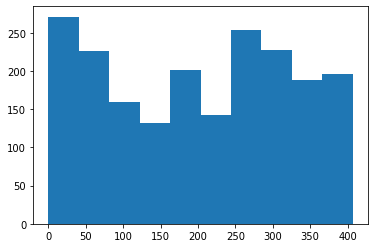

In [7]:
# Initialize the arrays

service_time = [0]*total_customers
arrival_time = [0]*total_customers
service_enter_time = [0]*total_customers
service_exit_time = [0]*total_customers
wait_time = [0]*total_customers

# Calculate arrival times and service times

for i in range(total_customers):
    service_time[i] = exp(service_rate)
for i in range(1, total_customers):
    #print(arrival_times[i-1])
    arrival_time[i] = arrival_time[i-1] + exp(arrival_rate)
    
# Calculate service enter and service exit times along with wait times

for i in range(1, total_customers):
    # if the customer in service leaves before the next one arrives
    if(service_exit_time[i-1] < arrival_time[i]):
        service_enter_time[i] = arrival_time[i]
    else:
        service_enter_time[i] = service_exit_time[i-1]
    service_exit_time[i] = service_enter_time[i] + service_time[i]
    wait_time[i] = service_enter_time[i] - arrival_time[i]

    
    
# Calculate and print average wait time

avg_wait_time = sum(wait_time)/len(wait_time)
print("average wait time in the queue is " + str(avg_wait_time))



# calculating queue length, excluding the person in service currently
i = 0 # pointer on the arrival time
j = 0 # pointer on service_enter time
len_queue = [0]
while(i < total_customers and j < total_customers):
    #print(i)
    while(i < total_customers and arrival_time[i] < service_enter_time[j]):
        len_queue.append(len_queue[-1] + 1)
        i = i + 1
    while(i < total_customers and j < total_customers and arrival_time[i] > service_enter_time[j]):
        len_queue.append(len_queue[-1] - 1)
        j = j + 1
    if(i < total_customers and j < total_customers and arrival_time[i] == service_enter_time[j]):
        i = i + 1
        j = j + 1
        len_queue.append(len_queue[-1])
while(i<total_customers):
    len_queue.append(len_queue[-1] + 1)
    i = i + 1
while(j<total_customers):
    len_queue.append(len_queue[-1] - 1)
    j = j + 1
    
# Calculating and printing average queue length

avg_q_len = sum(len_queue)/len(len_queue)
print("average length of the queue is " + str(avg_q_len))

plt.hist(len_queue)
plt.show()